# Ансамбли моделей машинного обучения. Часть 1.

## Подготовка

Загрузка датасета

In [37]:
import pandas as pd
df = pd.read_csv('GM_players_statistics.csv')

In [38]:
df.dtypes

ID                             int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

In [42]:
df.head()

ID                name        username  \
0   0       Komodo Engine     komodochess   
1   1        Vojtěch Plát     vojtechplat   
2   2  PlayMagnus Carlsen      playmagnus   
3   3      Magnus Carlsen   magnuscarlsen   
4   4     Fabiano Caruana  fabianocaruana   

                                       profile   user_id title    fide  \
0     https://www.chess.com/member/KomodoChess  24944922    GM  3411.0   
1     https://www.chess.com/member/VojtechPlat  37712368    GM  2950.0   
2      https://www.chess.com/member/PlayMagnus  19578862    GM  2882.0   
3   https://www.chess.com/member/MagnusCarlsen   3889224    GM  2882.0   
4  https://www.chess.com/member/FabianoCaruana  11177810    GM  2835.0   

          country  followers      joined  ... highest_bullet_date  bullet_win  \
0   United States        494  07/11/2015  ...          20/12/2020  946.055413   
1  Czech Republic        360  11/08/2017  ...          27/09/2021   32.000000   
2          Norway        199  05/11/2014  ...          20/12/2020  946.055413   
3          Norway     142482  27/08/2010  ...          28/03/2023  662.000000   
4   United States      14445  17/03/2013  ...          30/11/2021  713.000000   

   bullet_draw bullet_loss  highest_tactics_rating  highest_tactics_date  \
0    96.741688  649.266837                     400            07/11/2015   
1     8.000000   47.000000                    3251            15/09/2021   
2    96.741688  649.266837                     400            05/11/2014   
3    98.000000  246.000000                     400            27/08/2010   
4    65.000000  203.000000                    3519            14/06/2023   

   highest_puzzle_rush_score  is_streamer   status   league  
0                  53.611062        False  premium   Silver  
1                  49.000000        False  premium   Bronze  
2                  53.611062        False  premium   Silver  
3                  53.611062        False  premium    Elite  
4                  64.000000        False  premium  Crystal  

[5 rows x 35 columns]

Заполнение пропусков

In [61]:
from sklearn.impute import SimpleImputer

num_cols = []

for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)

    if dt=='float64' or dt=='int64':
        num_cols.append(col)
    
    if temp_null_count == 0:
        continue

    imp_strategy=''
    if dt=='float64' or dt=='int64':
        imp_strategy = 'mean'
    else:
        imp_strategy = 'most_frequent'

    imp_num = SimpleImputer(strategy=imp_strategy)
    data_num_imp = imp_num.fit_transform(df[[col]])
    df[[col]] = data_num_imp

df[num_cols]

ID    user_id         fide  followers  current_rapid_rating  \
0        0   24944922  3411.000000        494           2382.517536   
1        1   37712368  2950.000000        360           2383.000000   
2        2   19578862  2882.000000        199           2382.517536   
3        3    3889224  2882.000000     142482           2925.000000   
4        4   11177810  2835.000000      14445           2794.000000   
...    ...        ...          ...        ...                   ...   
1503  1503   13526852  2002.937568          2           2382.517536   
1504  1504    4042329  2002.937568        127           2375.000000   
1505  1505   83663714  2002.937568         37           2382.517536   
1506  1506  148025331  2002.937568          5           2382.517536   
1507  1507   32236996  2002.937568        884           2346.000000   

      highest_rapid_rating   rapid_win  rapid_draw  rapid_loss  \
0              2555.735206   35.672986   12.870142   15.783886   
1              2672.000000   12.000000    5.000000    6.000000   
2              2555.735206   35.672986   12.870142   15.783886   
3              2977.000000   43.000000   23.000000    8.000000   
4              3045.000000  122.000000  103.000000   46.000000   
...                    ...         ...         ...         ...   
1503           2555.735206   35.672986   12.870142   15.783886   
1504           2555.000000    7.000000    2.000000    6.000000   
1505           2555.735206   35.672986   12.870142   15.783886   
1506           2555.735206   35.672986   12.870142   15.783886   
1507           2550.000000  201.000000   13.000000   12.000000   

      current_blitz_rating  ...    blitz_win  blitz_draw   blitz_loss  \
0              2696.157781  ...  1460.873199  272.278098  1046.095821   
1              2823.000000  ...   976.000000  280.000000   847.000000   
2              2696.157781  ...  1460.873199  272.278098  1046.095821   
3              3287.000000  ...  1402.000000  292.000000   334.000000   
4              3125.000000  ...  1012.000000  194.000000   322.000000   
...                    ...  ...          ...         ...          ...   
1503           2375.000000  ...    50.000000    9.000000    27.000000   
1504           2415.000000  ...  3293.000000  538.000000  2521.000000   
1505           2961.000000  ...   338.000000   22.000000    96.000000   
1506           2771.000000  ...   138.000000    3.000000    11.000000   
1507           2613.000000  ...  1147.000000  150.000000   503.000000   

      current_bullet_rating  highest_bullet_rating  bullet_win  bullet_draw  \
0               2654.360614             2722.38549  946.055413    96.741688   
1               2661.000000             2750.00000   32.000000     8.000000   
2               2654.360614             2722.38549  946.055413    96.741688   
3               3249.000000             3390.00000  662.000000    98.000000   
4               3030.000000             3113.00000  713.000000    65.000000   
...                     ...                    ...         ...          ...   
1503            2102.000000             2083.00000   13.000000     1.000000   
1504            2400.000000             2594.00000  496.000000    47.000000   
1505            2654.360614             2722.38549  946.055413    96.741688   
1506            2654.360614             2722.38549  946.055413    96.741688   
1507            1865.000000             2645.00000  110.000000    15.000000   

      bullet_loss  highest_tactics_rating  highest_puzzle_rush_score  
0      649.266837                     400                  53.611062  
1       47.000000                    3251                  49.000000  
2      649.266837                     400                  53.611062  
3      246.000000                     400                  53.611062  
4      203.000000                    3519                  64.000000  
...           ...                     ...                        ...  
1503     7.000000                     4

Матрица корреляций

<Axes: >

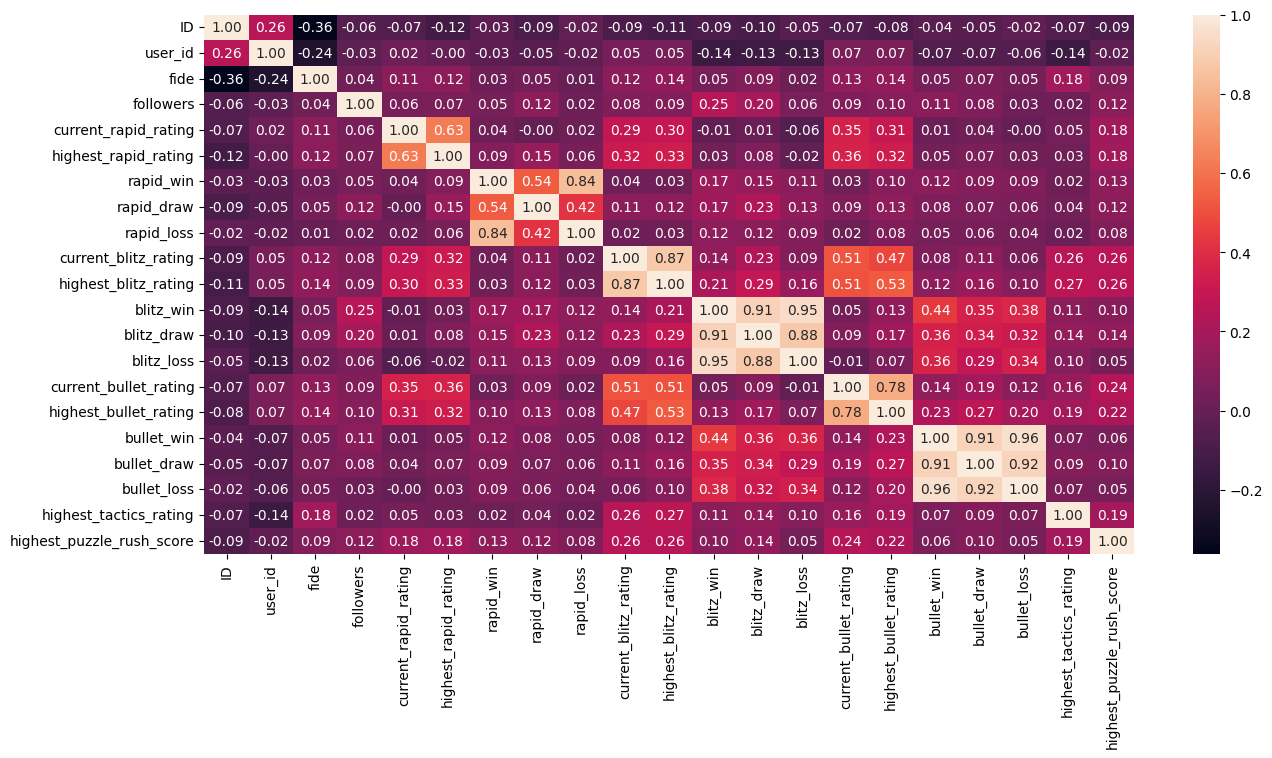

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Кодирование категориального признака `league`

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_enc_le = le.fit_transform(df['league'])
df['league_coded'] = cat_enc_le

## Разделение выборки на обучающую и тестовую

In [84]:
from sklearn.model_selection import train_test_split

x_df = df[num_cols] # числовые колонки

y_df = df[['league_coded']] # колонка с закодированной лигой

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=42)

## Бэггинг

In [85]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(n_estimators=5, oob_score=True, random_state=42)
bc.fit(x_train, y_train)

C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=42)

In [86]:
bc.estimators_samples_

[array([ 475, 1065,  970, ...,  152,  869,  201]),
 array([ 686,  663, 1011, ...,  439,  495,  207]),
 array([430, 800, 231, ..., 740,  37, 514]),
 array([800, 581,  63, ..., 610, 894, 408]),
 array([ 350,   25,  235, ...,  127,  843, 1059])]

In [87]:
import numpy as np

# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, x_df.shape[0]))
for i in range(5):
    for j in bc.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

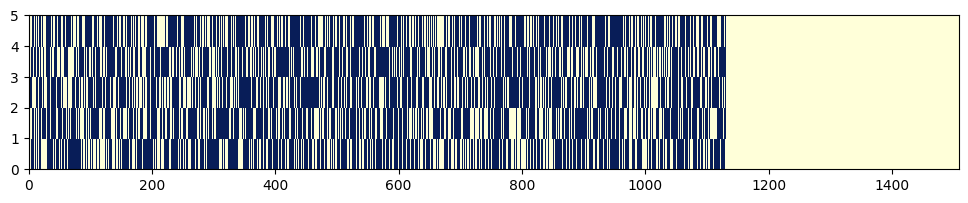

In [88]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [89]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 52.25%
Для модели № 2 размер OOB составляет 52.190000000000005%
Для модели № 3 размер OOB составляет 52.25%
Для модели № 4 размер OOB составляет 52.849999999999994%
Для модели № 5 размер OOB составляет 53.25%


In [90]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc.oob_score_, 1-bc.oob_score_

(0.2926613616268789, 0.707338638373121)

In [91]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# В данном примере три класса, 
# значения nan могут возвращаться в случае маленькой выборки
bc.oob_decision_function_[55:70]

array([[0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.66666667, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.5       , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.      

In [92]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [95]:
# Визуализация обученных решающих деревьев

Image(get_png_tree(bc.estimators_[0], x_df.columns), width='80%')

InvalidIndexError: (slice(None, None, None), 0)

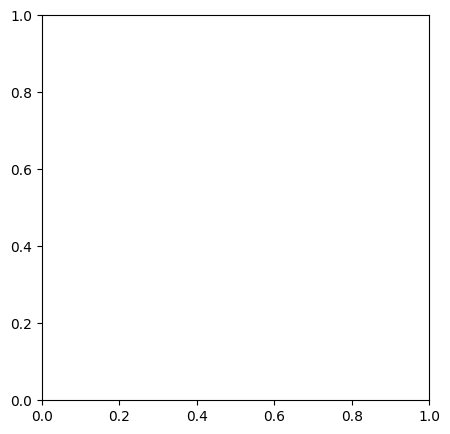

In [100]:
from sklearn.tree import DecisionTreeClassifier

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_cl(clf):
    title = clf.__repr__
    clf.fit(x_df, y_df)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = x_df[:, 0], x_df[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_df, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

plot_cl(DecisionTreeClassifier(random_state=1))